In [1]:
%matplotlib inline

In [2]:
from esi_utils_pager.growth import PopulationGrowth,adjust_pop
import pathlib
import matplotlib.pyplot as plt

We use a population growth model 

$$Pa = P * (1+r)^{-T}$$

where: 

P = initial population value

T = Time span (years)

r = Growth rate

Pa = Adjusted population

Our growth rates come from a UN spreadsheet, found here: http://esa.un.org/unpd/wpp/Download/Standard/Population/

The spreadsheet has growth rates per country, in half-decade increments.

The basic function *adjust_pop* is available through the public interface.

In [3]:
tpop = 2015
tevent = 2016
ccode = 841 #US
pop = 1e6
rate = 0.01 #1% growth rate
newpop = adjust_pop(pop,tpop,tevent,rate)
print('Adjusted population is: %s' % (format(int(newpop),",d")))

Adjusted population is: 1,010,000


We can have negative population growth...

In [4]:
tpop = 2016
tevent = 2015
pop = 1e6
rate = 0.01 #1% growth rate
newpop = adjust_pop(pop,tpop,tevent,rate)
print('Adjusted population is: %s' % (format(int(newpop),",d")))

Adjusted population is: 990,099


Normally we will use the PopulationGrowth class, created from the UN spreadsheet.

In [5]:
pg = PopulationGrowth.fromDefault()

We can get all the rates for a given (ISO numeric) country code.

1950: 0.01581
1955: 0.01724
1960: 0.01373
1965: 0.00987
1970: 0.00885
1975: 0.00948
1980: 0.00945
1985: 0.00985
1990: 0.01035
1995: 0.01211
2000: 0.00915
2005: 0.00907
2010: 0.00754


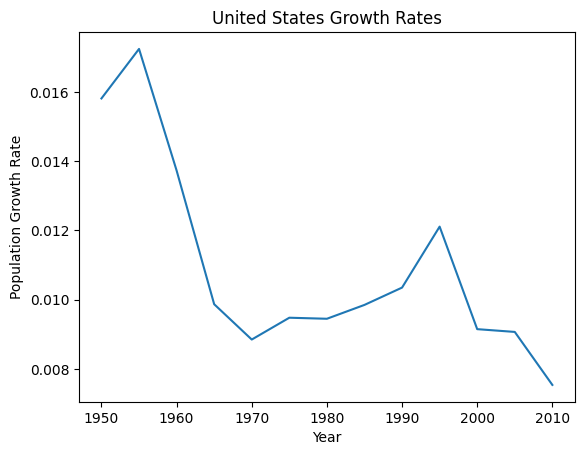

In [6]:
years,rates = pg.getRates(840)
for year,rate in zip(years,rates):
    print('%i: %.5f' % (year,rate))

plt.plot(years,rates);
plt.xlabel('Year');
plt.ylabel('Population Growth Rate');
plt.title('United States Growth Rates');

We can also just get a single year.

In [7]:
rate = pg.getRate(840,1963)
print(rate)

0.01373


Finally, and perhaps most usefully, we can use this class to apply the population growth rates for a country to a population data set (scalar or array).

In [8]:
population = 1e6
startyear = 1993
endyear = 2016
newpop = pg.adjustPopulation(population,840,startyear,endyear)
print(format(int(newpop),",d"))

1,252,189
